# 1. Data Processing


In [75]:
# Import necessary libraries
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import talib as ta
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings
# Import Dataset 
data = pd.read_csv('/Users/trancatkhanh/Desktop/Thesis_Code/Dataset/DNSE_Dataset_OHLC_daily.csv')
data['Date'] = pd.to_datetime(data['Date'])
import matplotlib.patches as mpatches


In [76]:
# Process Data Date get the date from 2020
data = data[data['Date']>='2020-01-01']
df_vnindex = data[data['Symbol']=='VNINDEX']
# Exclude all symbols that are not trading daily and symbols that are not trading stocks
data = data[data['Symbol'].str.len() <= 5]
data = data[~data['Symbol'].isin(data[data['Volume'] == 0]['Symbol'].unique())]

# 2.Data Label 

In [77]:
downtrend_periods = ['2020-01-01','2020-04-01','2021-01-15','2021-02-02','2021-07-01','2021-07-19','2022-04-09','2022-12-26','2023-08-08','2023-08-23','2023-09-13','2023-11-01']
uptrend_periods = ['2020-04-02','2020-06-09','2020-07-30','2021-01-13','2021-02-02','2021-06-30','2021-07-19','2021-10-27','2023-05-01','2023-08-07','2023-08-23','2023-09-13']
sideway_periods = ['2020-06-09','2020-07-30','2021-10-28','2022-04-08','2022-12-26','2023-05-01','2023-11-01','2023-12-20']

In [78]:

trend_periods = {
    'Downtrend': downtrend_periods,
    'Uptrend': uptrend_periods,
    'Sideways': sideway_periods
}
# Create empty lists to store data for the DataFrame
start_dates = []
end_dates = []
periods = []

# Loop through trend types and extract dates
for trend, dates in trend_periods.items():
    for i in range(len(dates) - 1):  # Iterate through all periods except the last one
        start_dates.append(dates[i])
        end_dates.append(dates[i+1])
        periods.append(trend)
    # Add the last period if it exists (no end date for the last period)
    if len(dates) > 1:
        start_dates.append(dates[-1])
        end_dates.append(pd.NA)  # Set end date as missing value (NA) for the last period
        periods.append(trend)

# Create the DataFrame
df = pd.DataFrame({
    'Start Date': start_dates,
    'End Date': end_dates,
    'Period': periods
})
# Sort the DataFrame by "Start Date" in ascending order
df = df.sort_values(by='Start Date')
df = df[~(df.index.isin([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]))] 
# Print the sorted DataFrame
df = df.reset_index(drop=True)
def format_date(date_str):
    """Formats date strings for readability."""
    return datetime.strptime(date_str, '%Y-%m-%d').strftime('%b %d, %Y')  # Customize date format as needed

def highlight_periods(value):
    """Highlights trend types with color."""
    if value == 'Downtrend':
        return f'<span style="color: red;">{value}</span>'
    elif value == 'Uptrend':
        return f'<span style="color: green;">{value}</span>'
    else:
        return f'<span style="color: blue;">{value}</span>'

styled_df = df[:-1].style \
    .format({'Start Date': format_date, 'End Date': format_date}) \
    .format({'Period': highlight_periods}) \
    .set_table_styles([  # Set table-wide styles
        {'selector': '', 'props': [('border', '1px solid black')]},
        {'selector': 'th', 'props': [('background-color', 'lightblue'), ('text-align', 'center')]},
    ]) \
    .set_caption("<b>Trend Periods ( 2020-01-01 to 2024-01-01)</b>")  # Add date range



In [79]:
styled_df

,Start Date,End Date,Period
0,2020-01-01,2020-04-01,Downtrend
1,2020-04-02,2020-06-09,Uptrend
2,2020-06-09,2020-07-30,Sideways
3,2020-07-30,2021-01-13,Uptrend
4,2021-01-15,2021-02-02,Downtrend
5,2021-02-02,2021-06-30,Uptrend
6,2021-07-01,2021-07-19,Downtrend
7,2021-07-19,2021-10-27,Uptrend
8,2021-10-28,2022-04-08,Sideways
9,2022-04-08,2022-12-26,Sideways


In [84]:
df_vnindex['Label']  = 1
# Sideway equals 1, downtrend equals 0, uptrend equals 2
for i in range(len(downtrend_periods)//2):
    df_vnindex['Label'][(df_vnindex['Date'] > downtrend_periods[2*i]) & (df_vnindex['Date'] < downtrend_periods[2*i+1])]= 0
for i in range(len(sideway_periods)//2):
    df_vnindex['Label'][(df_vnindex['Date'] > sideway_periods[2*i]) & (df_vnindex['Date'] < sideway_periods[2*i+1])]= 1
for i in range(len(uptrend_periods)//2):
    df_vnindex['Label'][(df_vnindex['Date'] > uptrend_periods[2*i]) & (df_vnindex['Date'] < uptrend_periods[2*i+1])]= 2

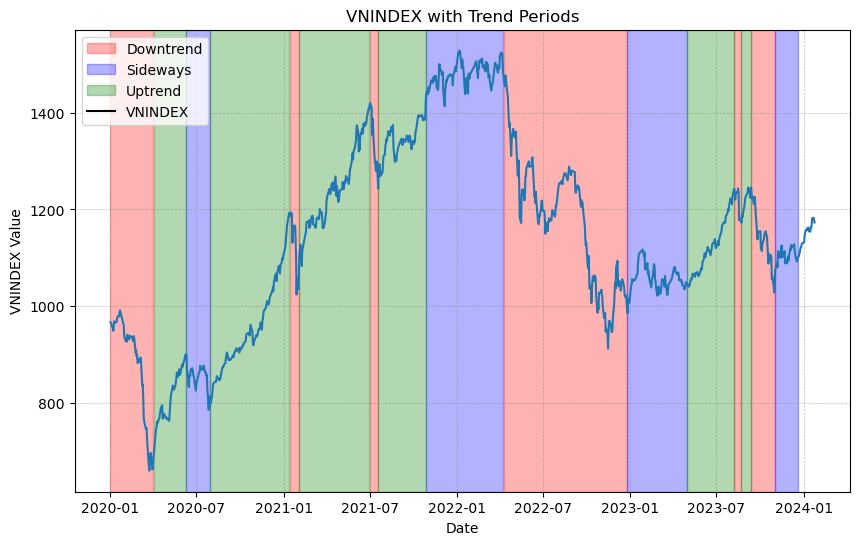

In [85]:
import matplotlib.pyplot as plt
import matplotlib
# Assuming you have downtrend_periods, sideway_periods, and uptrend_periods defined elsewhere

plt.figure(figsize=(10, 6))

# Plot VNINDEX data with normalization
plt.plot(df_vnindex['Date'], df_vnindex['Close'], label='VNINDEX')

# Shade downtrend periods with red color
for i in range(len(downtrend_periods)//2):
    plt.axvspan(downtrend_periods[2*i], downtrend_periods[2*i+1], color='red', alpha=0.3)
for i in range(len(sideway_periods)//2):
    plt.axvspan(sideway_periods[2*i], sideway_periods[2*i+1], color='blue', alpha=0.3)
for i in range(len(uptrend_periods)//2):
    plt.axvspan(uptrend_periods[2*i], uptrend_periods[2*i+1], color='green', alpha=0.3)
# Create legend handles for trend periods
import matplotlib.patches as mpatches
downtrend_patch = mpatches.Patch(color='red', alpha=0.3, label='Downtrend')
sideway_patch = mpatches.Patch(color='blue', alpha=0.3, label='Sideways')
uptrend_patch = mpatches.Patch(color='green', alpha=0.3, label='Uptrend')


# Customize plot
plt.title('VNINDEX with Trend Periods')
plt.xlabel('Date')
plt.ylabel('VNINDEX Value')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend(handles=[downtrend_patch, sideway_patch, uptrend_patch, plt.Line2D([], [], color='black', label='VNINDEX')])
plt.show()


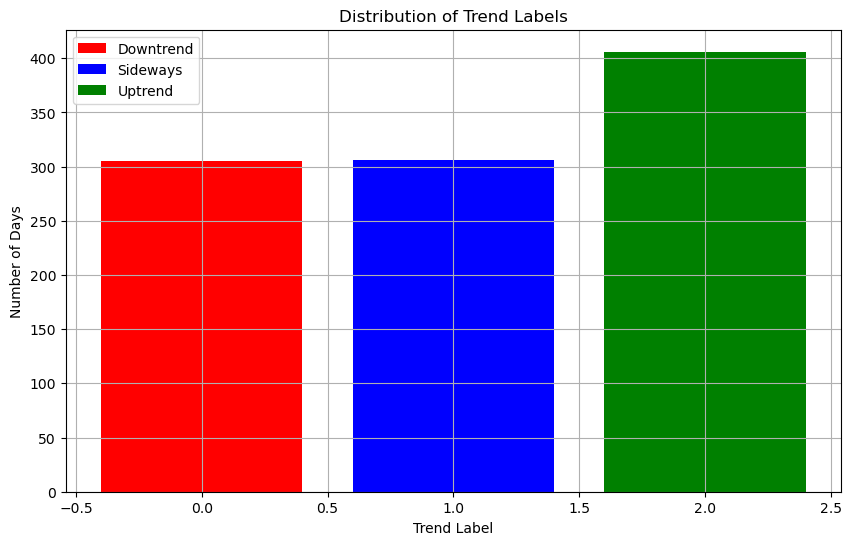

In [86]:

plt.figure(figsize=(10, 6))
df_vnindex['Label'].hist()
plt.title('Distribution of Trend Labels')
plt.xlabel('Trend Label')
plt.ylabel('Number of Days')
# add color to each bar
plt.bar([0, 1, 2], df_vnindex['Label'].value_counts().sort_index(), color=['red', 'blue', 'green'],label = ['Downtrend', 'Sideways', 'Uptrend'])
# plt.xticks([0, 1, 2], ['Downtrend', 'Sideways', 'Uptrend'])
plt.legend()
plt.show()



In [87]:
# Import necessary libraries
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import talib as ta
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings
# Import Dataset Labelled
df_vnindex = pd.read_csv('Dataset/VNINDEX_labelled.csv')
df_vnindex['Date'] = pd.to_datetime(df_vnindex['Date'])
df_vnindex = df_vnindex[df_vnindex['Date']>='2020-01-01']



import matplotlib.patches as mpatches
big_cap = ['BCM', 'BHN', 'BID', 'BVH', 'CTG', 'DCM', 'DHG', 'DPM', 'DXG', 'FPT', 'GEX', 'GMD', 'HDB', 'HPG', 'KDH', 'MBB', 'MSN', 'MWG', 'OCB', 'PDR', 'PGV', 'PLX', 'PNJ', 'PVI', 'PVS', 'SAB', 'SBT', 'SHB', 'SSB', 'SSI', 'TCB', 'TPB', 'VCB', 'VCG', 'VCI', 'VGC', 'VHM', 'VIB', 'VIC', 'VND', 'VNM', 'VPB', 'VPI', 'VRE']
mid_cap = ['AGG', 'AGR', 'APH', 'APS', 'ASM', 'AST', 'BAF', 'BFC', 'BIC', 'BSI', 'BVS', 'CAV', 'CEO', 'CHP', 'CMG', 'CTD', 'CTR', 'CTS', 'D2D', 'DBC', 'DBD', 'DCL', 'DDG', 'DGW', 'DHC', 'DHT', 'DMC', 'DRC', 'DRH', 'DTL', 'DVP', 'DXS', 'EVF', 'EVS', 'FCN', 'FIT', 'FMC', 'FRT', 'FTS', 'GEG', 'GIL', 'HAX', 'HDC', 'HHS', 'HNG', 'HRC', 'HT1', 'IDV', 'IJC', 'IMP', 'KHG', 'KOS', 'KSB', 'L18', 'LAS', 'LCG', 'LGC', 'LIX', 'MBS', 'MVB', 'NCT', 'NET', 'NHA', 'NKG', 'NSC', 'NT2', 'NTP', 'NVT', 'ORS', 'PAN', 'PC1', 'PDN', 'PGS', 'PLC', 'PPC', 'PSH', 'PVT', 'S4A', 'SBA', 'SEB', 'SGN', 'SGR', 'SHI', 'SHP', 'SHS', 'SKG', 'SMB', 'STG', 'STK', 'SZB', 'SZL', 'TBC', 'TCD', 'TCH', 'TCL', 'TCM', 'TDC', 'TDM', 'TDP', 'THG', 'THI', 'TIP', 'TLG', 'TLH', 'TMP', 'TN1', 'TNC', 'TNG', 'TNH', 'TRC', 'TSC', 'TVS', 'VCF', 'VDS', 'VFG', 'VIX', 'VPG', 'VSC']
small_cap = ['AAM', 'AAT', 'AAV', 'ABR', 'ABT', 'ACL', 'ADG', 'ALT', 'AMC', 'AME', 'APC', 'ATS', 'BAX', 'BBS', 'BCE', 'BDB', 'BED', 'BKC', 'BKG', 'BPC', 'BRC', 'BSC', 'BXH', 'C32', 'CAG', 'CAN', 'CAP', 'CCL', 'CCR', 'CIA', 'CJC', 'CLC', 'CLH', 'CLM', 'CLW', 'CMC', 'CMS', 'CMV', 'CPC', 'CRC', 'CTB', 'CTI', 'CX8', 'DAD', 'DAE', 'DAT', 'DBT', 'DHA', 'DHM', 'DIH', 'DL1', 'DNC', 'DP3', 'DPC', 'DQC', 'DRL', 'DSN', 'DST', 'DTD', 'DVG', 'DXP', 'DXV', 'ELC', 'FCM', 'GKM', 'GLT', 'GMC', 'GMH', 'GMX', 'GSP', 'HAD', 'HAP', 'HAR', 'HAT', 'HBS', 'HCD', 'HHP', 'HID', 'HII', 'HJS', 'HLD', 'HMC', 'HTC', 'HTI', 'HTV', 'HUB', 'HVH', 'HVT', 'ICG', 'ILB', 'INC', 'ITQ', 'IVS', 'KHP', 'KHS', 'KMT', 'KPF', 'KSD', 'KVC', 'L10', 'LHC', 'LM7', 'LM8', 'LSS', 'MBG', 'MCF', 'MCG', 'MCP', 'MDG', 'MHC', 'NAF', 'NAG', 'NAV', 'NBP', 'NDX', 'NFC', 'NHC', 'NHH', 'NST', 'NTH', 'PBP', 'PCE', 'PDB', 'PHC', 'PIA', 'PIC', 'PIT', 'PMB', 'PMC', 'PMG', 'PMP', 'PPP', 'PPS', 'PPY', 'PRC', 'PSD', 'PSI', 'PSW', 'PTC', 'PTS', 'PV2', 'PVB', 'PVC', 'SAF', 'SCI', 'SD9', 'SDN', 'SDT', 'SFI', 'SFN', 'SGC', 'SHA', 'SIC', 'SII', 'SMN', 'SRC', 'SSM', 'STC', 'STP', 'SVI', 'SVT', 'TCO', 'TCR', 'TCT', 'TDG', 'TDH', 'TDN', 'TEG', 'THB', 'THT', 'TIX', 'TKU', 'TMC', 'TOT', 'TPC', 'TSB', 'TTC', 'TTH', 'TTT', 'TV3', 'TVD', 'TVT', 'TXM', 'V21', 'VAF', 'VCA', 'VCC', 'VHE', 'VHL', 'VID', 'VIG', 'VLA', 'VNT', 'VPS', 'VTC', 'VTH', 'VTJ', 'VTL', 'VTZ', 'WCS', 'X20', 'YEG']
# Import Dataset 
data = pd.read_csv('Dataset/DNSE_Dataset_OHLC_daily.csv')
data['Date'] = pd.to_datetime(data['Date'])
import matplotlib.patches as mpatches
# Exclude all symbols that are not trading daily and symbols that are not trading stocks
data = data[data['Symbol'].str.len() <= 5]
data = data[~data['Symbol'].isin(data[data['Volume'] == 0]['Symbol'].unique())]
data = data[data['Date']>='2020-01-01']
df_big = data[data['Symbol'].isin(big_cap)]
df_mid = data[data['Symbol'].isin(mid_cap)]
df_small = data[data['Symbol'].isin(small_cap)]


# 3.  Market Segmentaion Label

I get this data from the IRAWARD 2023 from this link : https://vietstock.vn/2023/06/ir-awards-2023-hoat-dong-cong-bo-thong-tin-cua-nhom-mid-cap-co-su-cai-thien-830-1080316.htm

In [88]:
big_cap = ['BCM', 'BHN', 'BID', 'BVH', 'CTG', 'DCM', 'DHG', 'DPM', 'DXG', 'FPT', 'GEX', 'GMD', 'HDB', 'HPG', 'KDH', 'MBB', 'MSN', 'MWG', 'OCB', 'PDR', 'PGV', 'PLX', 'PNJ', 'PVI', 'PVS', 'SAB', 'SBT', 'SHB', 'SSB', 'SSI', 'TCB', 'TPB', 'VCB', 'VCG', 'VCI', 'VGC', 'VHM', 'VIB', 'VIC', 'VND', 'VNM', 'VPB', 'VPI', 'VRE']
mid_cap = ['AGG', 'AGR', 'APH', 'APS', 'ASM', 'AST', 'BAF', 'BFC', 'BIC', 'BSI', 'BVS', 'CAV', 'CEO', 'CHP', 'CMG', 'CTD', 'CTR', 'CTS', 'D2D', 'DBC', 'DBD', 'DCL', 'DDG', 'DGW', 'DHC', 'DHT', 'DMC', 'DRC', 'DRH', 'DTL', 'DVP', 'DXS', 'EVF', 'EVS', 'FCN', 'FIT', 'FMC', 'FRT', 'FTS', 'GEG', 'GIL', 'HAX', 'HDC', 'HHS', 'HNG', 'HRC', 'HT1', 'IDV', 'IJC', 'IMP', 'KHG', 'KOS', 'KSB', 'L18', 'LAS', 'LCG', 'LGC', 'LIX', 'MBS', 'MVB', 'NCT', 'NET', 'NHA', 'NKG', 'NSC', 'NT2', 'NTP', 'NVT', 'ORS', 'PAN', 'PC1', 'PDN', 'PGS', 'PLC', 'PPC', 'PSH', 'PVT', 'S4A', 'SBA', 'SEB', 'SGN', 'SGR', 'SHI', 'SHP', 'SHS', 'SKG', 'SMB', 'STG', 'STK', 'SZB', 'SZL', 'TBC', 'TCD', 'TCH', 'TCL', 'TCM', 'TDC', 'TDM', 'TDP', 'THG', 'THI', 'TIP', 'TLG', 'TLH', 'TMP', 'TN1', 'TNC', 'TNG', 'TNH', 'TRC', 'TSC', 'TVS', 'VCF', 'VDS', 'VFG', 'VIX', 'VPG', 'VSC']
small_cap = ['AAM', 'AAT', 'AAV', 'ABR', 'ABT', 'ACL', 'ADG', 'ALT', 'AMC', 'AME', 'APC', 'ATS', 'BAX', 'BBS', 'BCE', 'BDB', 'BED', 'BKC', 'BKG', 'BPC', 'BRC', 'BSC', 'BXH', 'C32', 'CAG', 'CAN', 'CAP', 'CCL', 'CCR', 'CIA', 'CJC', 'CLC', 'CLH', 'CLM', 'CLW', 'CMC', 'CMS', 'CMV', 'CPC', 'CRC', 'CTB', 'CTI', 'CX8', 'DAD', 'DAE', 'DAT', 'DBT', 'DHA', 'DHM', 'DIH', 'DL1', 'DNC', 'DP3', 'DPC', 'DQC', 'DRL', 'DSN', 'DST', 'DTD', 'DVG', 'DXP', 'DXV', 'ELC', 'FCM', 'GKM', 'GLT', 'GMC', 'GMH', 'GMX', 'GSP', 'HAD', 'HAP', 'HAR', 'HAT', 'HBS', 'HCD', 'HHP', 'HID', 'HII', 'HJS', 'HLD', 'HMC', 'HTC', 'HTI', 'HTV', 'HUB', 'HVH', 'HVT', 'ICG', 'ILB', 'INC', 'ITQ', 'IVS', 'KHP', 'KHS', 'KMT', 'KPF', 'KSD', 'KVC', 'L10', 'LHC', 'LM7', 'LM8', 'LSS', 'MBG', 'MCF', 'MCG', 'MCP', 'MDG', 'MHC', 'NAF', 'NAG', 'NAV', 'NBP', 'NDX', 'NFC', 'NHC', 'NHH', 'NST', 'NTH', 'PBP', 'PCE', 'PDB', 'PHC', 'PIA', 'PIC', 'PIT', 'PMB', 'PMC', 'PMG', 'PMP', 'PPP', 'PPS', 'PPY', 'PRC', 'PSD', 'PSI', 'PSW', 'PTC', 'PTS', 'PV2', 'PVB', 'PVC', 'SAF', 'SCI', 'SD9', 'SDN', 'SDT', 'SFI', 'SFN', 'SGC', 'SHA', 'SIC', 'SII', 'SMN', 'SRC', 'SSM', 'STC', 'STP', 'SVI', 'SVT', 'TCO', 'TCR', 'TCT', 'TDG', 'TDH', 'TDN', 'TEG', 'THB', 'THT', 'TIX', 'TKU', 'TMC', 'TOT', 'TPC', 'TSB', 'TTC', 'TTH', 'TTT', 'TV3', 'TVD', 'TVT', 'TXM', 'V21', 'VAF', 'VCA', 'VCC', 'VHE', 'VHL', 'VID', 'VIG', 'VLA', 'VNT', 'VPS', 'VTC', 'VTH', 'VTJ', 'VTL', 'VTZ', 'WCS', 'X20', 'YEG']

In [89]:
df_big = data[data['Symbol'].isin(big_cap)]
df_mid = data[data['Symbol'].isin(mid_cap)]
df_small = data[data['Symbol'].isin(small_cap)]

In [90]:
# import pandas as pd

# # Sample data in Vietnamese
# data = {
#     'Index': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
#     'Symbols': ['BCM', 'BHN', 'BID', 'BVH', 'CTG', 'DCM', 'DHG', 'DPM', 'DXG', 'FPT', 'GEX'],
#     'Company Name': [
#         'Industrial Investment and Development Corporation',
#         'Hanoi Beer Alcohol Beverage Corporation',
#         'Vietnam Investment and Development Bank',
#         'Bao Viet Holdings',
#         'Vietnam Construction Bank',
#         'Ca Mau Fertilizer and Chemicals Corporation',
#         'Hau Giang Pharmaceutical Joint Stock Company',
#         'Petrovietnam Fertilizer and Chemicals Corporation',
#         'Dat Xanh Real Estate Service and Construction Corporation',
#         'FPT Corporation',
#         'Gelex Corporation'
#     ],
#     'Exchange': ['HOSE'] * 11,
#     'Sector': [
#         'Real Estate', 'Food and Beverage', 'Banking', 'Insurance', 'Banking',
#         'Plastic and Chemical Production', 'Healthcare', 'Plastic and Chemical Production',
#         'Real Estate', 'Technology and Information', 'Supporting Industry'
#     ],
#     'Category': ['Big Cap'] * 11
# }

# # Convert the dictionary to a pandas DataFrame
# df = pd.DataFrame(data)

# # Print out the DataFrame
# df

# 4. Trend Feature

In [91]:
timeperiod = 14
for symbol in mid_cap:
    # # Calculate the DMI for the mid-cap symbol
    high = df_mid[df_mid['Symbol'] == symbol]['High']
    low =  df_mid[df_mid['Symbol'] == symbol]['Low']
    close = df_mid[df_mid['Symbol'] == symbol]['Close']
    Volume = df_mid[df_mid['Symbol'] == symbol]['Volume']
    df_mid.loc[df_mid['Symbol'] == symbol, 'plus_di'] = ta.PLUS_DI(high,low,close, timeperiod=timeperiod)
    df_mid.loc[df_mid['Symbol'] == symbol, 'minus_di'] = ta.MINUS_DI(high,low,close, timeperiod=timeperiod)
    df_mid.loc[df_mid['Symbol'] == symbol, 'adx'] = ta.ADX(high,low,close, timeperiod=timeperiod)
    # Trend Feature Creation
DMI_uptrend = df_mid.groupby('Date').apply(lambda x: ((x['plus_di'] > x['minus_di']) & (x['adx']>30) ).sum())
DMI_downtrend = df_mid.groupby('Date').apply(lambda x: ((x['minus_di'] > x['plus_di']) & (x['adx']>30) ).sum())
# number of compnay has +DI > -DI - number of company has -DI > +DI
DMI_feature = (DMI_uptrend - DMI_downtrend)
DMI_feature /= (DMI_feature.max())

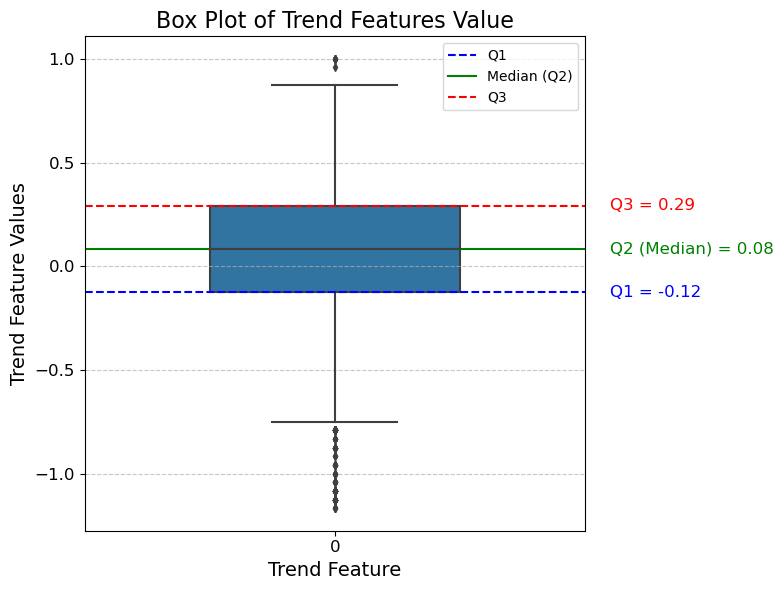

In [92]:
# Generate a more detailed and styled box plot using seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(data=DMI_feature, orient='v', width=0.5, linewidth=1.5, fliersize=4)

# Adding quartile information
quartiles = DMI_feature.quantile([0.25, 0.5, 0.75])
plt.axhline(quartiles[0.25], linestyle='--', color='blue', label='Q1')
plt.axhline(quartiles[0.5], linestyle='-', color='green', label='Median (Q2)')
plt.axhline(quartiles[0.75], linestyle='--', color='red', label='Q3')

# Annotate quartile values
plt.text(0.55, quartiles[0.25], f'Q1 = {quartiles[0.25]:.2f}', fontsize=12, va='center', color='blue')
plt.text(0.55, quartiles[0.5], f'Q2 (Median) = {quartiles[0.5]:.2f}', fontsize=12, va='center', color='green')
plt.text(0.55, quartiles[0.75], f'Q3 = {quartiles[0.75]:.2f}', fontsize=12, va='center', color='red')

# Adding title and labels
plt.title('Box Plot of Trend Features Value', fontsize=16)
plt.xlabel('Trend Feature', fontsize=14)
plt.ylabel('Trend Feature Values', fontsize=14)

# Adding legend
plt.legend()

# Adding grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding additional styling
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()  
plt.show()


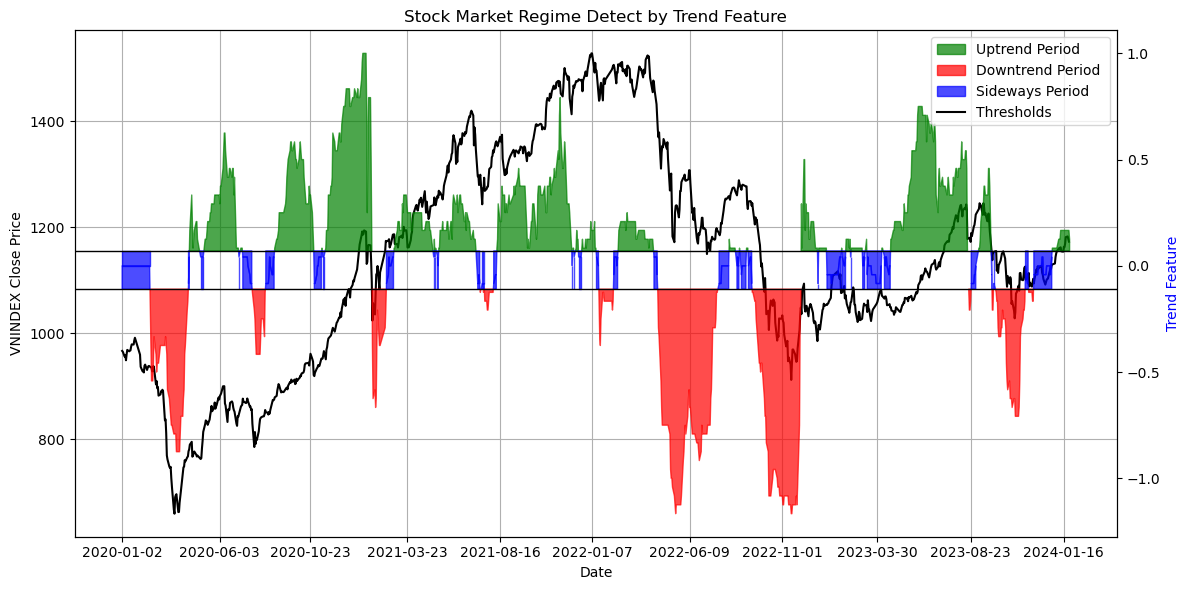

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

fig, ax1 = plt.subplots(figsize=(12, 6))  # Create a figure with one subplot

# Plot VNINDEX Close Price on ax1 (primary y-axis)
ax1.plot(df_vnindex['Date'], df_vnindex['Close'], color='black', label='VNINDEX Close')
ax1.set_title('Stock Market Regime Detect by Trend Feature')
ax1.set_xlabel('Date')
ax1.set_ylabel('VNINDEX Close Price', color='black')
ax1.grid(True)

ax2 = ax1.twinx()  # Create a twin axis that shares the x-axis with ax1

ax2.fill_between(DMI_feature.index, DMI_feature, 0.07, where=DMI_feature > 0.07, interpolate=True, color='green', alpha=0.7, label='Positive Trend Feature')
ax2.fill_between(DMI_feature.index, DMI_feature, -0.11, where=DMI_feature < -0.11, interpolate=True, color='red', alpha=0.7, label='Negative Trend Feature')
ax2.fill_between(DMI_feature.index, DMI_feature, 0.07, where=(DMI_feature >= -0.11) & (DMI_feature <= 0.07), interpolate=True, color='blue', alpha=0.7, label=' Trend Sideways')
ax2.fill_between(DMI_feature.index, DMI_feature, -0.11, where=(DMI_feature >= -0.11) & (DMI_feature <= 0.07), interpolate=True, color='blue', alpha=0.7, label=' Trend Sideways')
# Plot a horizontal line at thresholds
ax2.axhline(0.07, color='black', lw=1)
ax2.axhline(-0.11, color='black', lw=1)

# Set labels and legend for ax2 (momentum feature)
ax2.set_ylabel('Trend Feature', color='blue')

# Create legend handles for trend periods and VNINDEX
downtrend_patch = mpatches.Patch(color='red', alpha=0.3, label='Downtrend')
sideway_patch = mpatches.Patch(color='blue', alpha=0.3, label='Sideways')
uptrend_patch = mpatches.Patch(color='green', alpha=0.3, label='Uptrend')
legend_handles = [
    downtrend_patch,
    sideway_patch,
    uptrend_patch,
    plt.Line2D([], [], color='black', label='VNINDEX Close'),
    mpatches.Patch(color='green', alpha=0.7, label='Uptrend Period'),
    mpatches.Patch(color='red', alpha=0.7, label='Downtrend Period '),
    mpatches.Patch(color='blue', alpha=0.7, label='Sideways Period'),
    plt.Line2D([], [], color='black', label='Thresholds')
]

# Add labels and legend
ax2.legend(handles=legend_handles[4:], loc='upper right')  
ax1.set_xticks(df_vnindex['Date'][::len(df_vnindex)//10])  
plt.xticks(rotation=45)  

plt.tight_layout()  # Adjust spacing for better layout
plt.show()


# 5. Volatility Feature

In [58]:
timeperiod = 14
for symbol in small_cap:
    high = df_small[df_small['Symbol'] == symbol]['High']
    low =  df_small[df_small['Symbol'] == symbol]['Low']
    close = df_small[df_small['Symbol'] == symbol]['Close']
    Volume = df_small[df_small['Symbol'] == symbol]['Volume']
    df_small.loc[df_small['Symbol'] == symbol, 'ATR'] = ta.ATR(high, low, close, timeperiod=timeperiod)

In [59]:
# Step 1: Group the DataFrame by 'Date' and calculate the mean ATR for each date
mean_atr_per_date = df_small.groupby('Symbol')['ATR'].mean().reset_index(name='Mean_ATR')

# Step 2: Merge the original DataFrame with the mean ATR per date DataFrame
df_with_mean_atr = df_small.merge(mean_atr_per_date, on='Symbol')

# Step 3: Filter rows where the symbol's ATR is greater than the mean ATR of its date
symbols_above_mean_atr = df_with_mean_atr[df_with_mean_atr['ATR'] > df_with_mean_atr['Mean_ATR']]
symbols_below_mean_atr = df_with_mean_atr[df_with_mean_atr['ATR'] < df_with_mean_atr['Mean_ATR']]


In [60]:

# Step 4: Count the number of symbols for each date that meet the criteria
count_symbols_above_mean_atr = symbols_above_mean_atr.groupby('Date').size()
count_symbols_below_mean_atr = symbols_below_mean_atr.groupby('Date').size()


In [61]:
count_symbols_above_mean_atr = (count_symbols_above_mean_atr - count_symbols_below_mean_atr)/len(small_cap)
# # count_symbols_above_mean_atr /= len(small_cap)

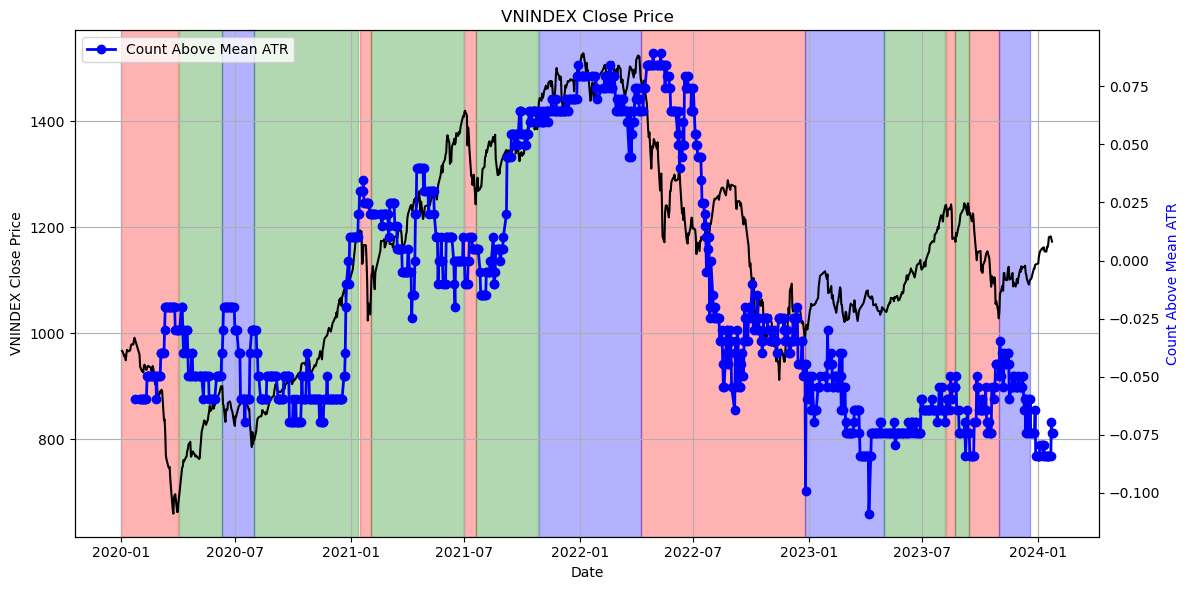

In [62]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))  # Create a figure with one subplot

# Plot VNINDEX Close Price on ax1 (primary y-axis)
ax1.plot(df_vnindex['Date'], df_vnindex['Close'], color='black', label='VNINDEX Close')
ax1.set_title('VNINDEX Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('VNINDEX Close Price', color='black')
ax1.grid(True)
for i in range(len(downtrend_periods)//2):
    plt.axvspan(downtrend_periods[2*i], downtrend_periods[2*i+1], color='red', alpha=0.3)
for i in range(len(sideway_periods)//2):
    plt.axvspan(sideway_periods[2*i], sideway_periods[2*i+1], color='blue', alpha=0.3)
for i in range(len(uptrend_periods)//2):
    plt.axvspan(uptrend_periods[2*i], uptrend_periods[2*i+1], color='green', alpha=0.3)
ax2 = ax1.twinx()  # Create a twin axis that shares the x-axis with ax1
ax2.plot(count_symbols_above_mean_atr, color='blue', marker='o', linestyle='-', linewidth=2, label='Count Above Mean ATR')
ax2.set_ylabel('Count Above Mean ATR', color='blue')

# Add labels and legend
plt.legend(loc='upper left')
plt.xticks(rotation=45) 
plt.tight_layout() 

plt.show()


# 6 Momemtum Feature

In [63]:
timeperiod = 14
for symbol in big_cap:
    # # Calculate the DMI for the mid-cap symbol
    high = df_big[df_big['Symbol'] == symbol]['High']
    low =  df_big[df_big['Symbol'] == symbol]['Low']
    close = df_big[df_big['Symbol'] == symbol]['Close']
    Volume = df_big[df_big['Symbol'] == symbol]['Volume']
    df_big.loc[df_big['Symbol'] == symbol, 'RSI'] = ta.RSI(df_big[df_big['Symbol'] == symbol]['Close'], timeperiod=timeperiod)
    df_big.loc[df_big['Symbol'] == symbol, 'CMO'] = ta.CMO(df_big[df_big['Symbol'] == symbol]['Close'], timeperiod=timeperiod)


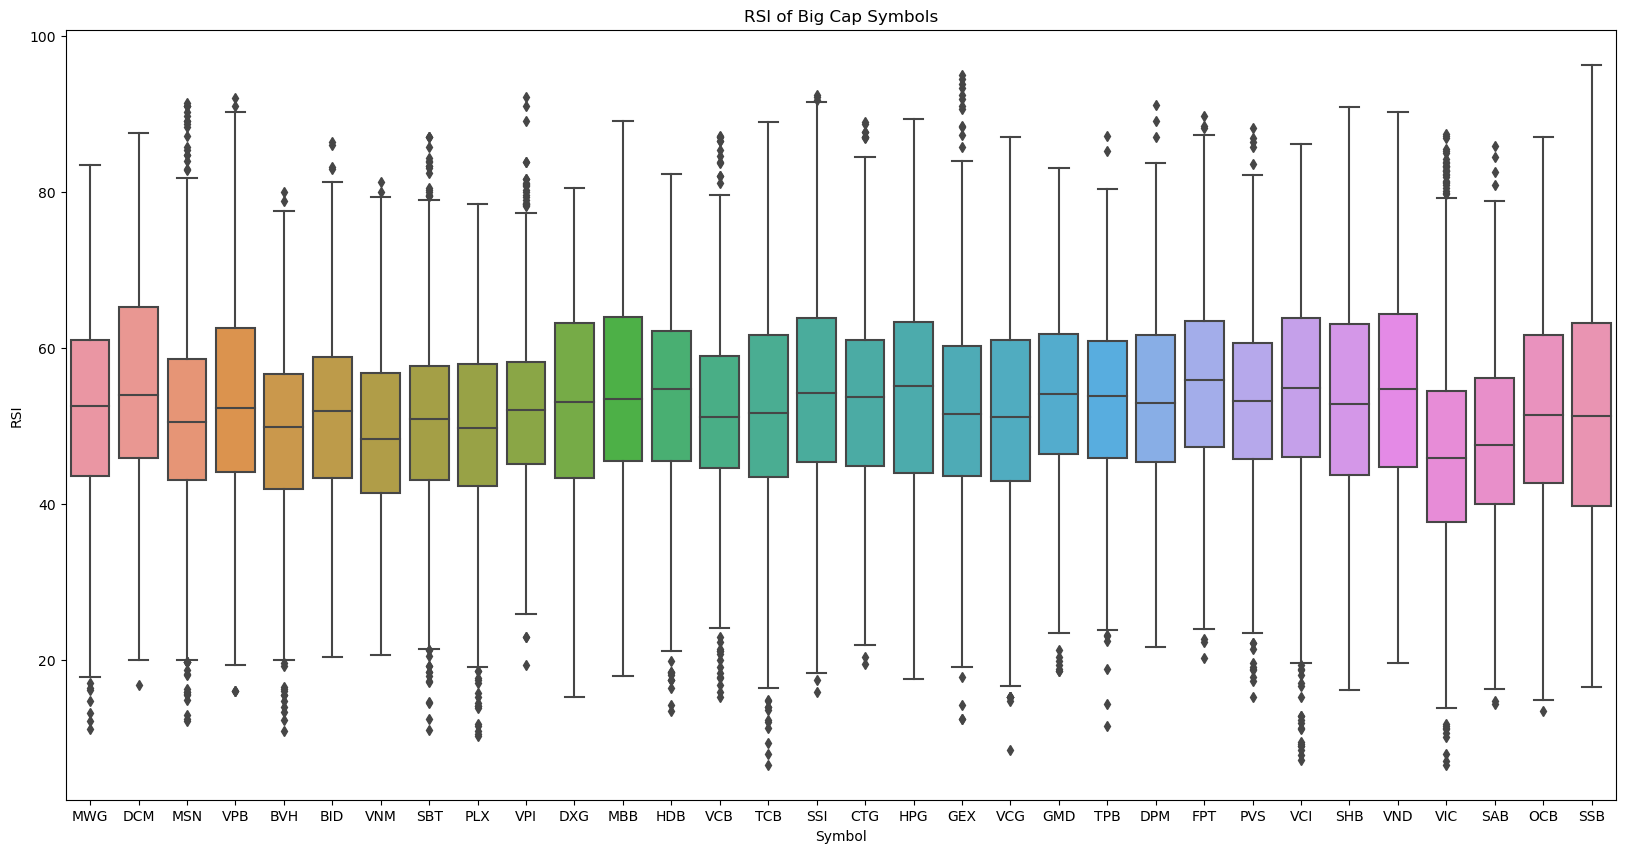

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(x='Symbol', y='RSI', data=df_big)
plt.title('RSI of Big Cap Symbols')
plt.show()   


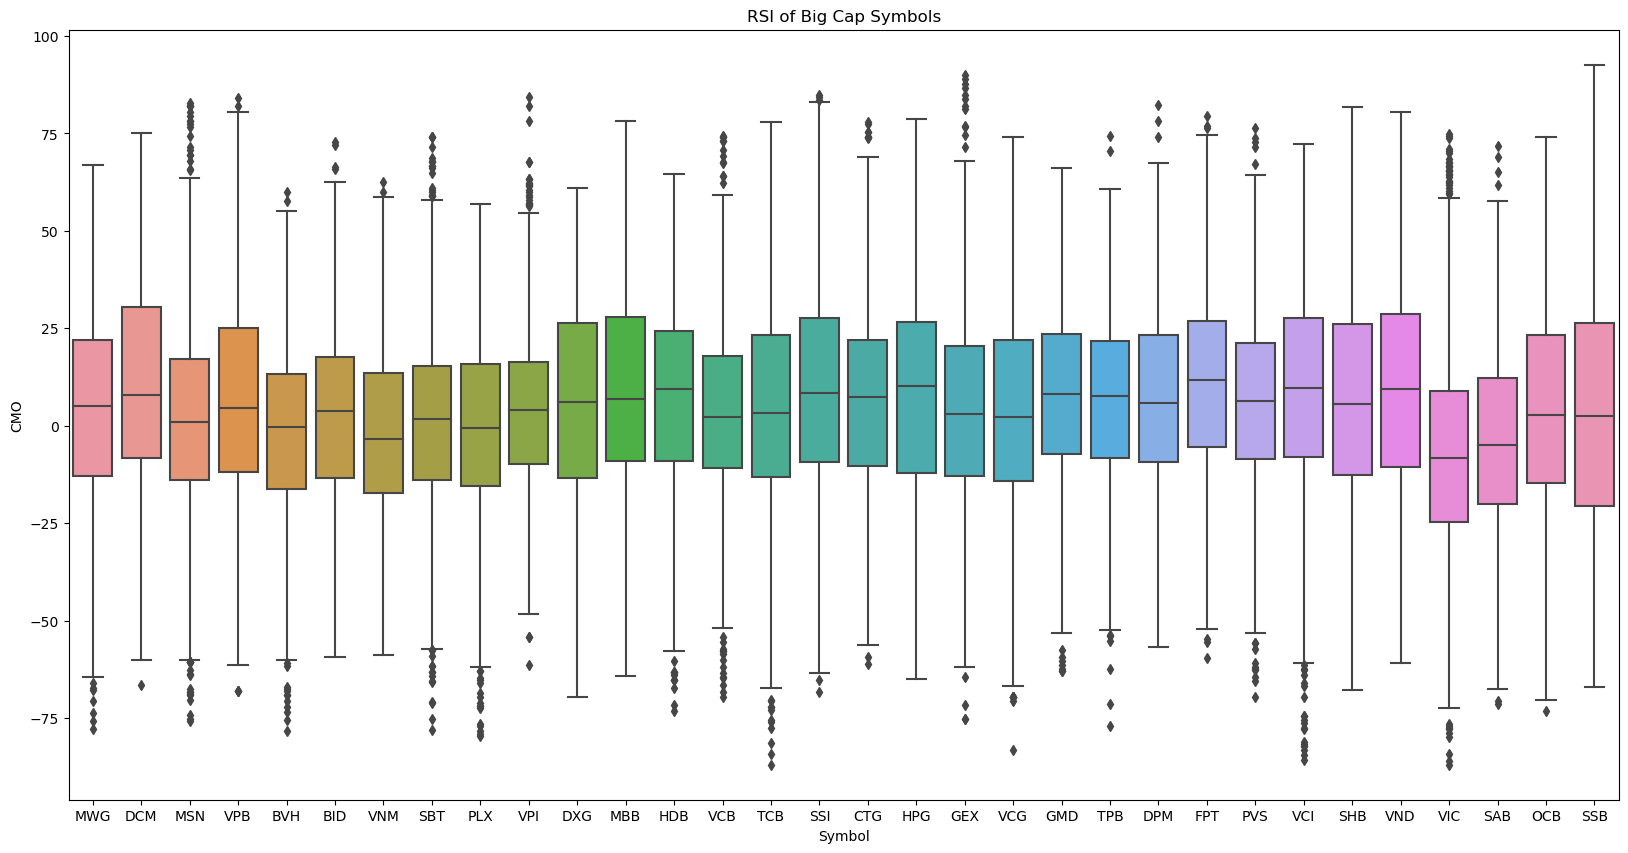

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(x='Symbol', y='CMO', data=df_big)
plt.title('RSI of Big Cap Symbols')
plt.show()   


In [66]:
up_mom = df_big.groupby('Date').apply(lambda x: ((x['RSI'] > 60) & (x['CMO']>50) ).sum())
down_mom = df_big.groupby('Date').apply(lambda x: ((x['RSI'] < 30) & (x['CMO']<-50) ).sum())
Momemtum_feature = (up_mom-down_mom)/len(big_cap)

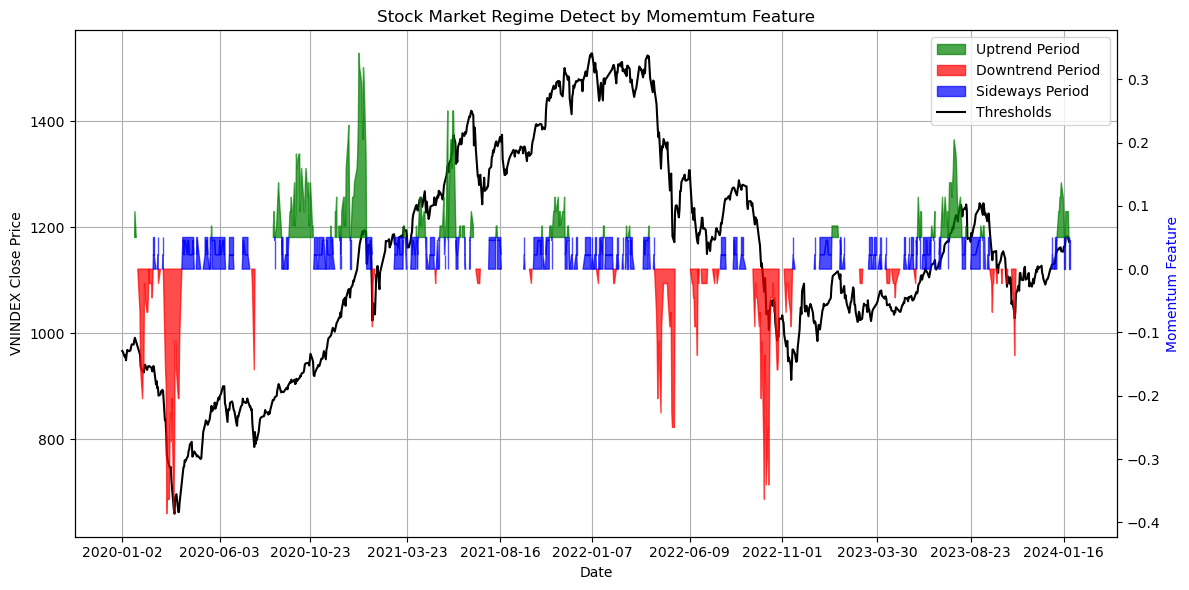

In [67]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

fig, ax1 = plt.subplots(figsize=(12, 6))  # Create a figure with one subplot

# Plot VNINDEX Close Price on ax1 (primary y-axis)
ax1.plot(df_vnindex['Date'], df_vnindex['Close'], color='black', label='VNINDEX Close')
ax1.set_title('Stock Market Regime Detect by Momemtum Feature')
ax1.set_xlabel('Date')
ax1.set_ylabel('VNINDEX Close Price', color='black')
ax1.grid(True)

ax2 = ax1.twinx()  # Create a twin axis that shares the x-axis with ax1

# Fill areas for positive and negative momentum feature and sideways momentum feature
ax2.fill_between(Momemtum_feature.index, Momemtum_feature, 0.05, where=Momemtum_feature >= 0.05, interpolate=True, color='green', alpha=0.7, label='Positive Momentum Feature')
ax2.fill_between(Momemtum_feature.index, Momemtum_feature, 0, where=Momemtum_feature < 0, interpolate=True, color='red', alpha=0.7, label='Negative Momentum Feature')
ax2.fill_between(Momemtum_feature.index, Momemtum_feature, 0.05, where=(Momemtum_feature >0 ) & (Momemtum_feature < 0.05), interpolate=True, color='blue', alpha=0.7, label='Momentum Feature Sideways')
ax2.fill_between(Momemtum_feature.index, Momemtum_feature, 0, where=(Momemtum_feature >0 ) & (Momemtum_feature < 0.05), interpolate=True, color='blue', alpha=0.7, label='Momentum Feature Sideways')


# Set labels and legend for ax2 (momentum feature)
ax2.set_ylabel('Momentum Feature', color='blue')

# Create legend handles for trend periods and VNINDEX
downtrend_patch = mpatches.Patch(color='red', alpha=0.3, label='Downtrend')
sideway_patch = mpatches.Patch(color='blue', alpha=0.3, label='Sideways')
uptrend_patch = mpatches.Patch(color='green', alpha=0.3, label='Uptrend')
legend_handles = [
    downtrend_patch,
    sideway_patch,
    uptrend_patch,
    plt.Line2D([], [], color='black', label='VNINDEX Close'),
    mpatches.Patch(color='green', alpha=0.7, label='Uptrend Period'),
    mpatches.Patch(color='red', alpha=0.7, label='Downtrend Period '),
    mpatches.Patch(color='blue', alpha=0.7, label='Sideways Period'),
    plt.Line2D([], [], color='black', label='Thresholds')
]

# Add labels and legend
ax2.legend(handles=legend_handles[4:], loc='upper right')  # Adjust position for ax2 legend
ax1.set_xticks(df_vnindex['Date'][::len(df_vnindex)//10])  # Adjust x-axis ticks for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust spacing for better layout
plt.show()


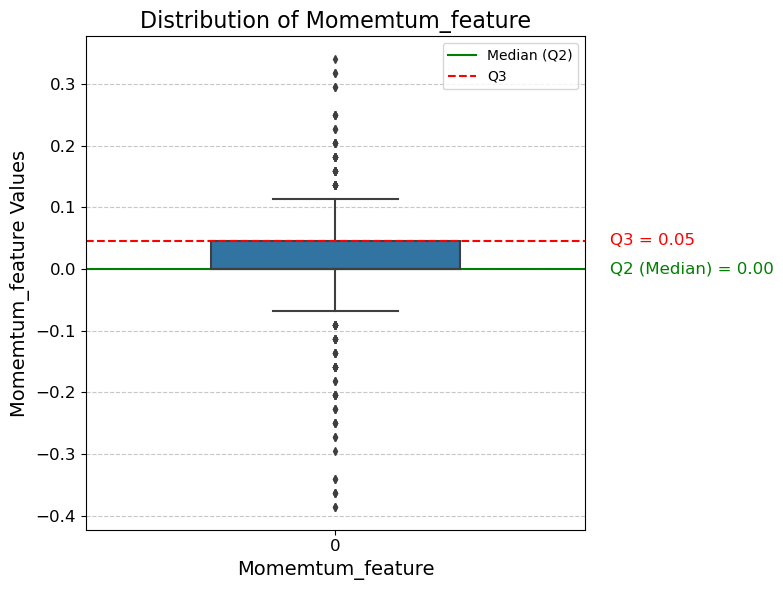

In [68]:


# Generate a more detailed and styled box plot using seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(data=Momemtum_feature, orient='v', width=0.5, linewidth=1.5, fliersize=4)

# Adding quartile information
quartiles = Momemtum_feature.quantile([0.25, 0.5, 0.75])
# plt.axhline(quartiles[0.25], linestyle='--', color='blue', label='Q1')
plt.axhline(quartiles[0.5], linestyle='-', color='green', label='Median (Q2)')
plt.axhline(quartiles[0.75], linestyle='--', color='red', label='Q3')

# Annotate quartile values
# plt.text(0.55, quartiles[0.25], f'Q1 = {quartiles[0.25]:.2f}', fontsize=12, va='center', color='blue')
plt.text(0.55, quartiles[0.5], f'Q2 (Median) = {quartiles[0.5]:.2f}', fontsize=12, va='center', color='green')
plt.text(0.55, quartiles[0.75], f'Q3 = {quartiles[0.75]:.2f}', fontsize=12, va='center', color='red')

# Adding title and labels
plt.title('Distribution of Momemtum_feature', fontsize=16)
plt.xlabel('Momemtum_feature', fontsize=14)
plt.ylabel('Momemtum_feature Values', fontsize=14)

# Adding legend
plt.legend()

# Adding grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding additional styling
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()


# 7 Volume Feature

In [69]:

# Calculate the mean average volume for each symbol
df_big['mean_volume'] = df_big.groupby('Symbol')['Volume'].transform('mean')

# Filter the data to include only rows where the volume is below the mean average volume and the close.diff() is up
df_filtered = df_big[df_big['Volume'] < df_big['mean_volume']]
df_filtered = df_filtered[df_filtered['Close'] > df_filtered['Open']]

count_symbols = df_filtered.groupby('Date')['Symbol'].count()


<Axes: >

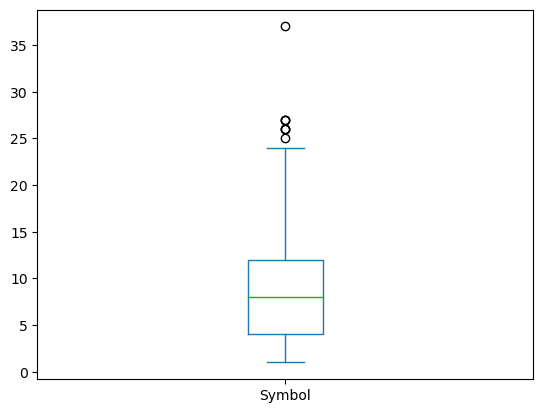

In [70]:
count_symbols.plot(kind = 'box')

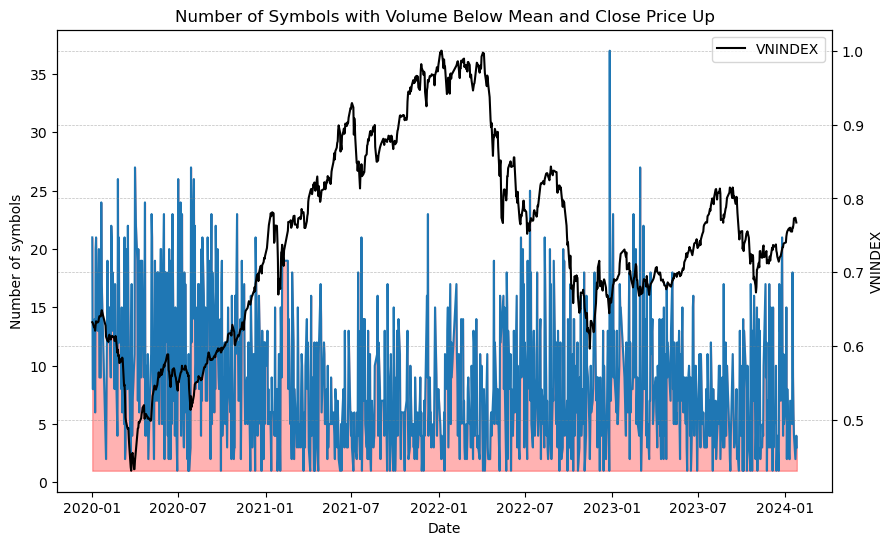

In [71]:
# prompt: plot count_symbols and df_vnindex using ax.twinx()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))

ax.fill_between(count_symbols.index, count_symbols, 1, where=count_symbols >= 1, interpolate=True, color='red', alpha=0.3)
ax.fill_between(count_symbols.index, count_symbols, 1, where=count_symbols < 1, interpolate=True, color='green', alpha=0.3)
ax.plot(count_symbols.index, count_symbols.values)

ax.set_ylabel('Number of symbols')
ax.set_xlabel('Date')
ax.set_title('Number of Symbols with Volume Below Mean and Close Price Up')

ax2 = ax.twinx()
ax2.plot(df_vnindex['Date'], df_vnindex['Close']/df_vnindex['Close'].max(), color='black', label='VNINDEX')
ax2.set_ylabel('VNINDEX', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.show()

# 8 Correlation Feature Benchmark


In [72]:
DMI_corrected = DMI_feature[:-1]  


df_vnindex['Feature_Trend'] = DMI_corrected.values

count_symbols3_corrected = count_symbols_above_mean_atr.reindex(df_vnindex['Date'], method='bfill')
df_vnindex['Feature_Volatility'] = count_symbols3_corrected.values

count_symbols2_corrected = Momemtum_feature.reindex(df_vnindex['Date'], method='bfill')
df_vnindex['Feature_Momemtum'] = count_symbols2_corrected.values

feature_volume = count_symbols.reindex(df_vnindex['Date'], method='bfill')
df_vnindex['Feature_Volume'] = feature_volume.values
df_vnindex['DNSE_Expert_Regime_Label'] = df_vnindex['Label']

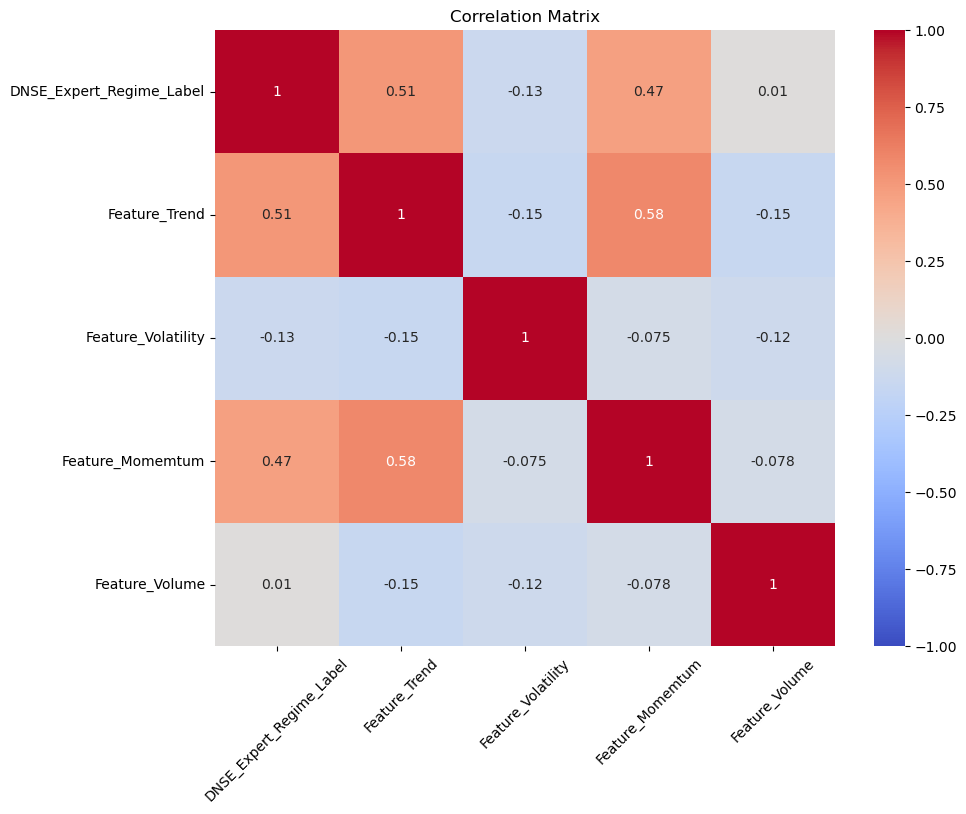

In [73]:
correlation_matrix = df_vnindex[['DNSE_Expert_Regime_Label', 'Feature_Trend','Feature_Volatility','Feature_Momemtum','Feature_Volume']].corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()